# Protests In South Africa

In [30]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from math import cos, sin, pi
from IPython.display import display, HTML, Javascript
from tune_sklearn import TuneGridSearchCV

%matplotlib inline
sns.set_style("ticks") 

In [2]:
df_protests = pd.read_csv('./saprotest.csv')
df_protests.head()

,ISSID,Province,Municipality_metro,Metro,Rural,TownCity_Name,Suburbareaplacename,Police_Station,Coordinates,Latitude,...,Cross_Street,Start_Date,End_Date,Ongoing,type,type_id,Violent_or_violent,violent,Rangecode,Reasonforprotest
0,105,9,Western Cape - City of Cape Town,1,0,Cape Town,Khayelitsha; Town Two phase four informal sett...,WC - Khayelitsha,"-34.034239,18.677953",-34.034238,...,Lansdowne Road,02/01/2013,02/12/2013,1,Service delivery,9,Violent,1,5,Protests during which people from other areas ...
1,4,1,Eastern Cape - Senqu,0,1,Sterkspruit,Sterkspruit,EC - Sterkspruit,"-30.524935,27.364588",-30.524934,...,Zastron road,01/01/2013,01/24/2013,1,Service delivery,9,Violent,1,1,The residents wanted Sterkspruit to be moved f...
2,67,6,KwaZulu Natal - eThekwini,1,0,Durban,"Dundee, Forbes & Manhattan Coal processing pla...",KZN - Dundee,"-28.170436,30.230345",-28.170435,...,Not applicable,01/17/2013,01/26/2013,1,Labour related,4,Violent,1,3,Decreased amount: the miners had initially bee...
3,730,3,Gauteng - City of Tshwane,1,0,Pretoria,Pretoria West - Lotus Gardens,GP - Pretoria West,"-25.751159,28.083004",-25.751159,...,Brizia Cres,01/03/2013,01/03/2013,0,Vigilantism,7,Violent,1,5,"Residents stoned the house, smashed windows an..."
4,62,3,Gauteng - City of Johannesburg,1,0,Johannesburg,"Johannesburg, Nelson Mandela bridge",GP - Johannesburg Central,"-26.128008,28.03176",-26.128008,...,Bompas,01/04/2013,01/04/2013,0,Crime related,1,Peaceful,0,3,The news of the death of South African mountai...


## Exploring Data

In [3]:
#Getting Province Name as Column
#There is a mispelt entry with  "Western CApe" instaed of "Western Cape" 
Province_name = []
for x in df_protests.Municipality_metro.values:
    #print(x.split(' -')[0])
    if x.split(' - ')[0]=='Western CApe':
        Province_name.append('Western Cape')
    else:
        Province_name.append(x.split(' - ')[0])
df_protests['Province_Name'] = Province_name

## Where do the most protests occur?


In [4]:
df_city = df_protests.groupby('TownCity_Name').count()
#print(np.max(df_city['TownCity_Name'].values))
city = np.argmax(df_city['Province'].values)
print('Anser is:' ,df_city.index[city])


Anser is: Johannesburg


<Figure size 1440x864 with 0 Axes>

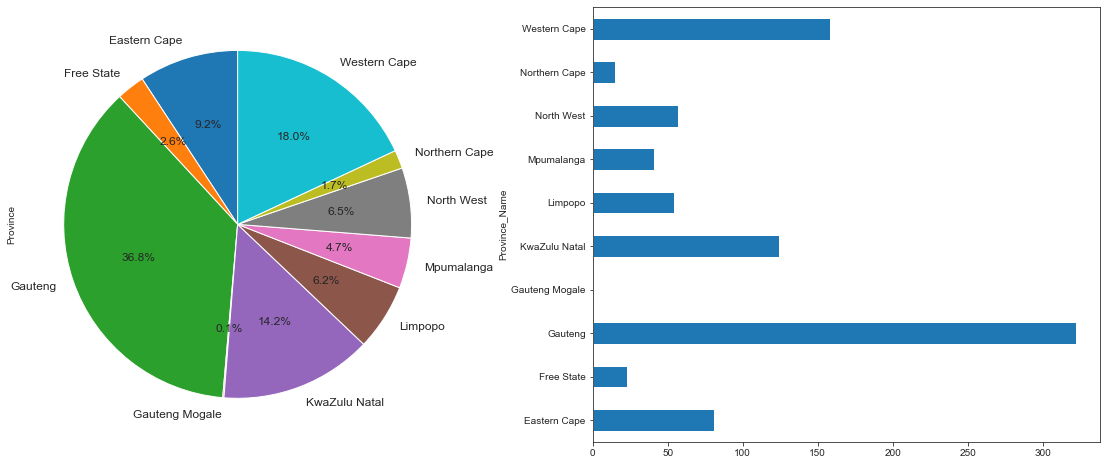

In [5]:
df_province = df_protests.groupby('Province_Name').count()

fig = plt.figure(figsize=[20,12])
plt.figure(figsize=(20,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_province.plot(kind='pie', y = 'Province', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_province.index, legend = False, fontsize=12)

ax2 = plt.subplot(122)
df_province['Province'].plot.barh()

Anser : Johannesburg,Gauteng

## Where do the most violent protest occur?

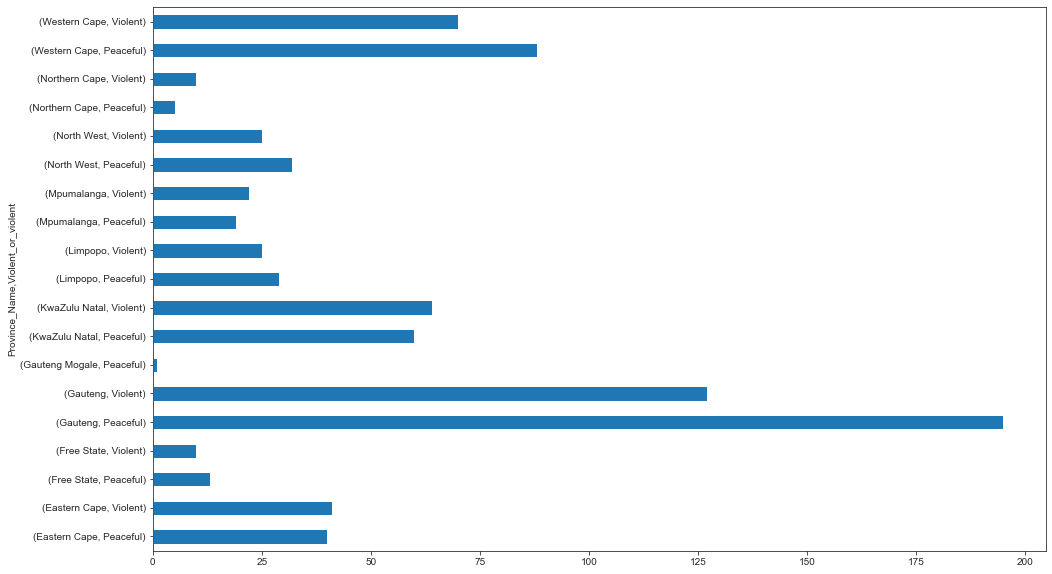

In [6]:
df_province = df_protests.groupby(['Province_Name','Violent_or_violent']).count()
plt.figure(figsize=(16,10))
df_province['Province'].plot.barh()

<Figure size 1440x864 with 0 Axes>

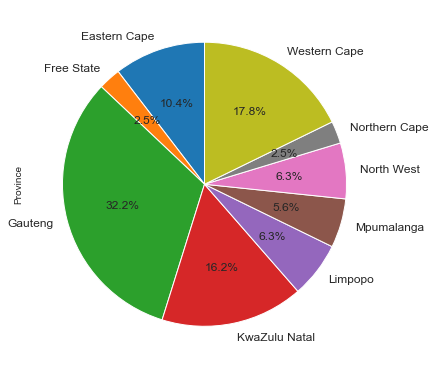

In [7]:
df_province = df_protests.where(df_protests.Violent_or_violent=='Violent').groupby('Province_Name').count()
fig = plt.figure(figsize=[20,12])
plt.figure(figsize=(14,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_province.plot(kind='pie', y = 'Province', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_province.index, legend = False, fontsize=12)

Anser : Gauteng

## What is the biggest reason for protests  ?

<Figure size 1440x864 with 0 Axes>

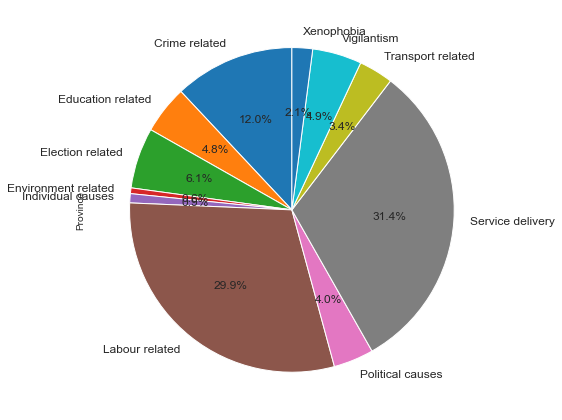

In [8]:
df_province = df_protests.groupby('type').count()
fig = plt.figure(figsize=[20,12])
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_province.plot(kind='pie', y = 'Province', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_province.index, legend = False, fontsize=12)

Service Delivery and Labour Related Issues

## Which province had the most protests in each year?

In [10]:
df_protests.loc[:,'Start_Date'] = pd.to_datetime(df_protests['Start_Date'], errors='coerce')
df_protests.loc[:,'End_Date'] = pd.to_datetime(df_protests['Start_Date'], errors='coerce')
df_protests.loc[:,'Year'] = df_protests['Start_Date'].dt.year

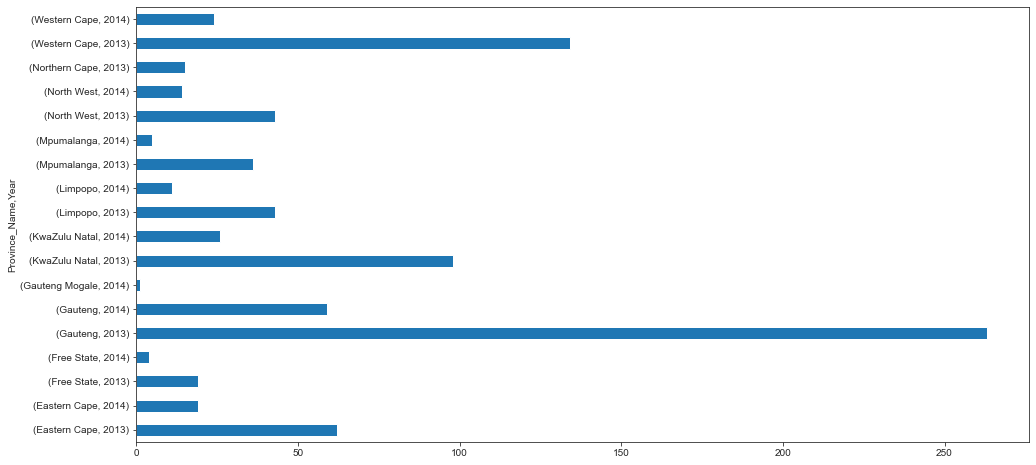

In [11]:
df_province = df_protests.groupby(['Province_Name','Year']).count()['Province']
plt.figure(figsize=(16,8))
df_province.plot.barh()

<Figure size 1440x864 with 0 Axes>

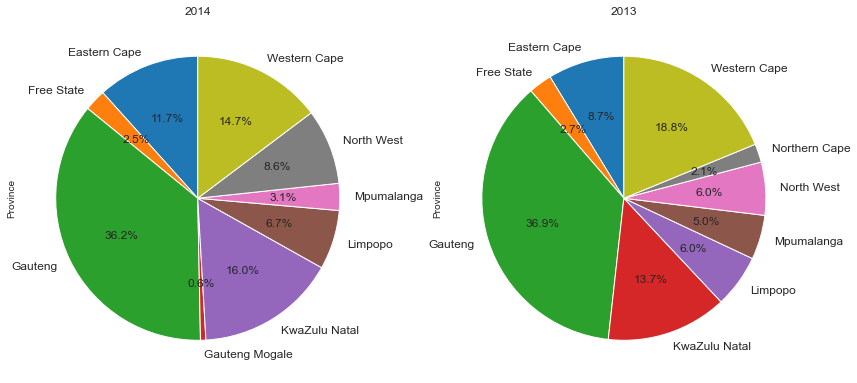

In [12]:
df_province_2014 = df_protests.where(df_protests.Year==2014).groupby('Province_Name').count()
df_province_2013 = df_protests.where(df_protests.Year==2013).groupby('Province_Name').count()


fig = plt.figure(figsize=[20,12])
plt.figure(figsize=(14,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
ax1.set_title("2014")
df_province_2014.plot(kind='pie', y = 'Province', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_province_2014.index, legend = False, fontsize=12)
ax2 = plt.subplot(122, aspect='equal')
ax2.set_title("2013")
df_province_2013.plot(kind='pie', y = 'Province', ax=ax2, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_province_2013.index, legend = False, fontsize=12)

Anser : Gauteng

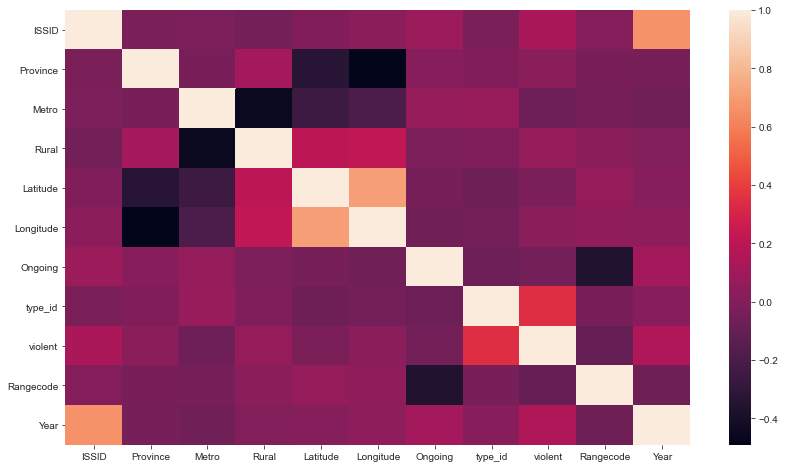

In [13]:
corr_matrix = df_protests.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix)

The Reason for protest(service delivery ,crime, education ect) is fairly correlated with nature of the protest(violent and peacefull), Year and ISSID are relatively higher correlated.

## Prediction and Feature Selection

### Selecting Columns that are numeric or boolean 

In [14]:
df_protests = pd.read_csv('./saprotest.csv')
formated_ = (df_protests.dtypes !=object)
ff = []
for i in range(len(formated_)):
    if(formated_[i]==True):
        ff.append(i)

In [15]:
Atrib =df_protests.columns[ff]


Performing PCA on the data and using the variance to determine how many features we need selecting using the elbow technique

,0,1,2,3,4,5,6,7,8,9
0,-335.773162,10.407553,2.778200,-1.472436,0.010619,-0.546622,-0.220607,0.364440,1.010774,0.053449
1,-436.766169,-0.582309,4.062104,3.996120,0.027783,3.435340,1.151342,0.637329,0.121116,-0.446751
2,-373.764546,-2.837036,-1.410031,-0.429799,-2.753187,1.573467,-0.309024,-0.176682,0.907278,0.120002
3,289.233798,-3.080162,1.727506,-0.072444,1.783905,-0.555491,-0.122584,-0.502292,0.334291,-0.083876
4,-378.764904,-3.428129,-4.320508,1.151821,1.245521,1.429632,-0.261714,-0.520926,-0.321129,-0.079601


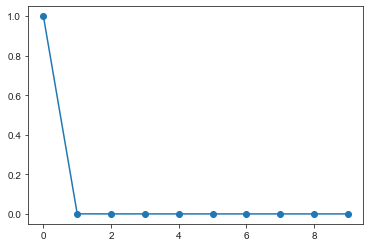

In [16]:
from sklearn.decomposition import PCA
fit = PCA().fit(df_protests[Atrib])
Z = fit.transform(df_protests[Atrib])
pd.Series(fit.explained_variance_ratio_).plot(marker='o')
pd.DataFrame(Z).head()


Transforming the data using 2 principal componenets

In [17]:
fit = PCA(n_components=2).fit(df_protests[Atrib].values)
Z = fit.transform(df_protests[Atrib].values)

Using KMeans, I find the natural clusters of the data.

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans( random_state=0).fit(df_protests[Atrib].values)
kmeans.labels_;

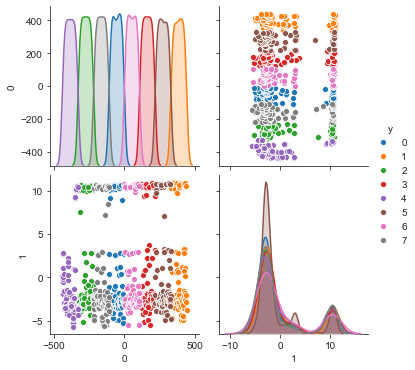

In [19]:
new_data = pd.DataFrame(Z)
new_data['y'] = kmeans.labels_
sns.pairplot(new_data, hue='y');

In [46]:
df_cluster = df_protests.copy()
df_cluster['cluster'] = kmeans.labels_

### Build model with clusters as labels

In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn import svm

In [22]:
X, X_Valid,Y,Y_Valid = train_test_split(Z, kmeans.labels_, test_size=0.25, random_state=None)

In [36]:

print('SVM-Linear ====================================================================')
clf_svm = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear', probability=True, random_state=0, shrinking=True,
    tol=0.01, verbose=False);
clf_svm.fit(X,Y);
validation_acc = clf_svm.score(X_Valid,Y_Valid)
print('Validation Acc: %.4f' % validation_acc )

SVM-Linear ====================================================================
Validation Acc: 0.9772


In [45]:
print('Hyperparameter Tuning =================================================================')
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
 # {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
tune_search = GridSearchCV(
   svm.SVC( cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3,gamma='auto',probability=True, random_state=0, shrinking=True,tol=0.01, verbose=False),
   param_grid,
   n_jobs=-1,
)

# fit supervised learning model on entire training dataset
tune_search.fit(X, Y)
# make predictions on hold out test set
validation_acc = tune_search.score(X_Valid,Y_Valid)
print(tune_search.best_params_)
print('Validation Acc: %.4f' % validation_acc )

Hyperparameter Tuning =================================================================
{'C': 1, 'kernel': 'linear'}
Validation Acc: 0.9772


In [24]:
df_protests.loc[:,'End_Date'] = pd.to_datetime(df_protests['End_Date'], errors='coerce')
df_reg = df_protests
df_reg.index = df_reg['End_Date'].map(lambda x: 100*x.year + x.month)

In [25]:
fit1 = smf.ols(formula="ISSID ~ Rural + type_id +violent +Rangecode", data=df_reg).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  ISSID   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6.410
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           4.38e-05
Time:                        08:14:10   Log-Likelihood:                -6084.3
No. Observations:                 876   AIC:                         1.218e+04
Df Residuals:                     871   BIC:                         1.220e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    423.9303     41.616     10.187      0.0

In [26]:
def residuals(fit):
    fig = plt.figure(figsize=[10,6]);
    ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
    fit.resid.plot(ax=ax1)
    fig.tight_layout()

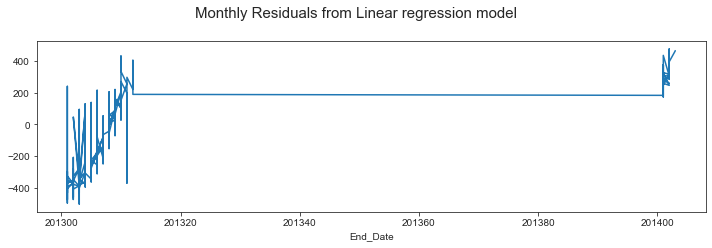

In [27]:
ax = residuals(fit1)    
plt.suptitle('Monthly Residuals from Linear regression model', size = 15);
plt.subplots_adjust(top=0.9)

## Which were the most impactful features?

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

Feature ranking:
1. feature 0 (0.609683) ISSID
2. feature 5 (0.089760) Longitude
3. feature 4 (0.087688) Latitude
4. feature 7 (0.062160) type_id
5. feature 6 (0.033926) Ongoing
6. feature 9 (0.033095) Rangecode
7. feature 1 (0.031797) Province
8. feature 8 (0.021910) violent
9. feature 2 (0.015966) Metro
10. feature 3 (0.014015) Rural


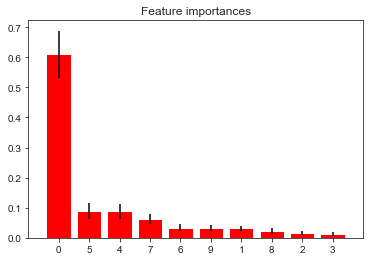

In [29]:
forest = ExtraTreesClassifier(n_estimators=50,
                              random_state=0)

forest.fit(df_protests[Atrib],kmeans.labels_)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_protests[Atrib].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),Atrib[indices[f]] )

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_protests[Atrib].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_protests[Atrib].shape[1]), indices)
plt.xlim([-1, df_protests[Atrib].shape[1]])
plt.show()

1. Improve model by converting  Longitude, Latitude to distance from some point of the map
2. Remove ISSID